In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix


In [4]:
df = pd.read_csv("company_esg_financial_dataset.csv")
df.head()


,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [5]:
df.shape

(11000, 16)

In [6]:
df.columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [8]:
df.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [9]:
df.isnull().sum()

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

In [10]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [11]:
df.isnull().sum()

CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64

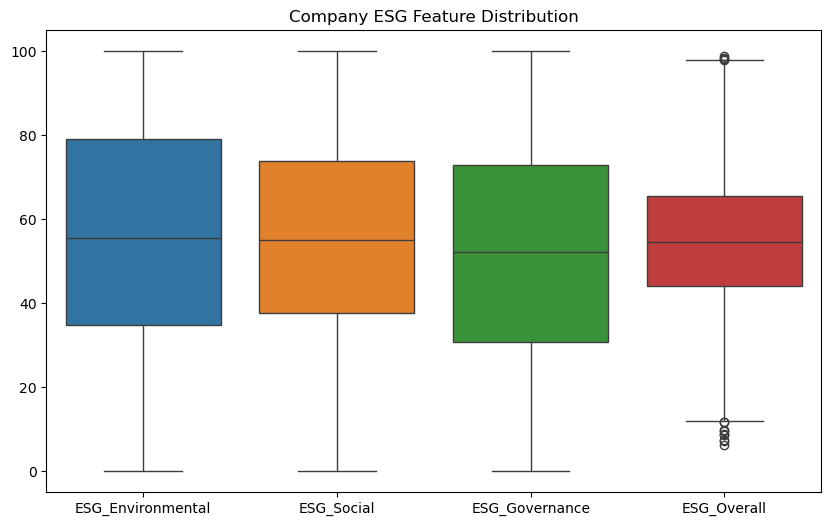

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[[
    "ESG_Environmental",
    "ESG_Social",
    "ESG_Governance",
    "ESG_Overall"
]])
plt.title("Company ESG Feature Distribution")
plt.show()

In [13]:
# Emission intensity
df["emission_intensity"] = df["CarbonEmissions"] / df["EnergyConsumption"]

# Normalize water risk
df["water_risk"] = df["WaterUsage"] / df["WaterUsage"].max()

# Renewable risk and Waste risk calculations have been removed as 'Renewable_Energy_Percentage' and 'Waste_Generated' columns are not present in the DataFrame.

In [14]:
df["esg_risk_score"] = (
    (0.4 / (0.4 + 0.2)) * df["emission_intensity"] + # Recalculate weight for emission_intensity
    (0.2 / (0.4 + 0.2)) * df["water_risk"] # Recalculate weight for water_risk
)

# Normalize ESG score to 0–1
df["esg_risk_score"] = (
    df["esg_risk_score"] - df["esg_risk_score"].min()
) / (
    df["esg_risk_score"].max() - df["esg_risk_score"].min()
)

df[["CompanyName", "esg_risk_score"]].head()

,CompanyName,esg_risk_score
0,Company_1,0.814888
1,Company_1,0.814902
2,Company_1,0.814970
3,Company_1,0.814950
4,Company_1,0.814942


In [15]:
def assign_risk(score):
    if score < 0.33:
        return "Low Risk"
    elif score < 0.66:
        return "Medium Risk"
    else:
        return "High Risk"

df["risk_category"] = df["esg_risk_score"].apply(assign_risk)
df["risk_category"].value_counts()


risk_category
Low Risk       4904
High Risk      3546
Medium Risk    2550
Name: count, dtype: int64

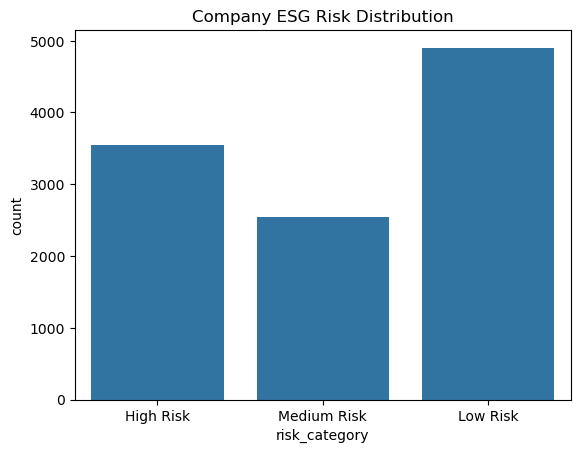

In [16]:
sns.countplot(x="risk_category", data=df)
plt.title("Company ESG Risk Distribution")
plt.show()


In [17]:
features = [
    "emission_intensity",
    "water_risk"
]

X = df[features]

le = LabelEncoder()
y = le.fit_transform(df["risk_category"])

# Save the LabelEncoder
import pickle
with open('esg_encoder.pkl', 'wb') as f:
    pickle.dump(le, f)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42
)


In [19]:
model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

# Save the trained model
import pickle
with open('esg_model.pkl', 'wb') as f:
    pickle.dump(model, f)

In [20]:
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred, target_names=le.classes_))


              precision    recall  f1-score   support

   High Risk       1.00      1.00      1.00       851
    Low Risk       1.00      1.00      1.00      1254
 Medium Risk       0.99      1.00      1.00       645

    accuracy                           1.00      2750
   macro avg       1.00      1.00      1.00      2750
weighted avg       1.00      1.00      1.00      2750



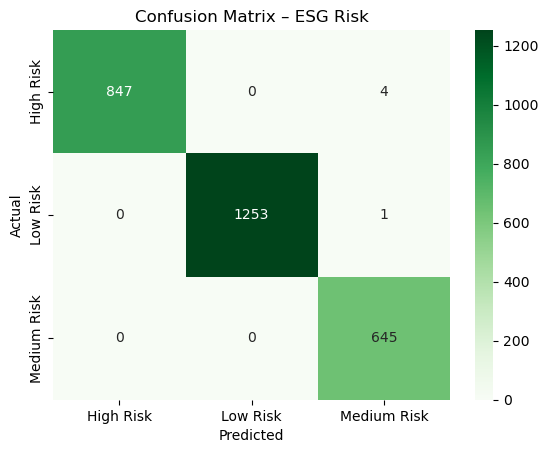

In [21]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Greens",
    xticklabels=le.classes_,
    yticklabels=le.classes_
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – ESG Risk")
plt.show()


In [22]:
new_company = pd.DataFrame({
    "emission_intensity": [1200 / 500],
    "water_risk": [300 / df["WaterUsage"].max()]
})

prediction = model.predict(new_company)
risk_label = le.inverse_transform(prediction)

print("Predicted ESG Risk Category:", risk_label[0])

Predicted ESG Risk Category: High Risk


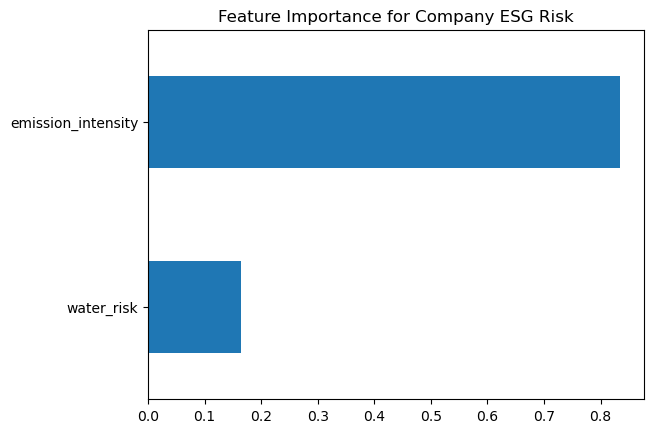

In [23]:
importance = pd.Series(
    model.feature_importances_,
    index=features
).sort_values()

importance.plot(kind="barh")
plt.title("Feature Importance for Company ESG Risk")
plt.show()
